In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [50]:
import loader

src_dir = './data'
benchmarks = loader.load_benchmarks_from_dir(src_dir)
df = pd.DataFrame(benchmarks)
df.head()

,name,family_index,per_family_instance_index,run_name,run_type,repetitions,repetition_index,threads,iterations,real_time,cpu_time,time_unit,label,filename
0,BM_CCA/cca_simplified_sv/DatasetFileIndex:0/ma...,0,0,BM_CCA/cca_simplified_sv/DatasetFileIndex:0/ma...,iteration,1,0,1,33,21.277545,1503.323035,ms,tml_full/ttbar_mu20/,cuda_cca.json
1,BM_CCA/cca_simplified_sv/DatasetFileIndex:1/ma...,0,1,BM_CCA/cca_simplified_sv/DatasetFileIndex:1/ma...,iteration,1,0,1,20,34.963654,3296.441827,ms,tml_full/ttbar_mu40/,cuda_cca.json
2,BM_CCA/cca_simplified_sv/DatasetFileIndex:2/ma...,0,2,BM_CCA/cca_simplified_sv/DatasetFileIndex:2/ma...,iteration,1,0,1,16,44.425600,5749.924185,ms,tml_full/ttbar_mu60/,cuda_cca.json
3,BM_CCA/cca_simplified_sv/DatasetFileIndex:3/ma...,0,3,BM_CCA/cca_simplified_sv/DatasetFileIndex:3/ma...,iteration,1,0,1,12,60.613563,11622.533302,ms,tml_full/ttbar_mu100/,cuda_cca.json
4,BM_CCA/cca_simplified_sv/DatasetFileIndex:4/ma...,0,4,BM_CCA/cca_simplified_sv/DatasetFileIndex:4/ma...,iteration,1,0,1,8,88.080671,26280.240893,ms,tml_full/ttbar_mu200/,cuda_cca.json


In [51]:
import preprocessor

df = preprocessor.transform_dataframe(df)
df.head()

,benchmark,programming_model,target_mode,environment,algorithm,dataset,activations,kernel_time,cpu_time,time_unit,iterations,repetitions
0,cuda_cca,cuda,gpu,traccc,simplified_sv,mu20,401913,21.277545,1503.323035,ms,33,1
1,cuda_cca,cuda,gpu,traccc,simplified_sv,mu40,687499,34.963654,3296.441827,ms,20,1
2,cuda_cca,cuda,gpu,traccc,simplified_sv,mu60,1023445,44.425600,5749.924185,ms,16,1
3,cuda_cca,cuda,gpu,traccc,simplified_sv,mu100,1716732,60.613563,11622.533302,ms,12,1
4,cuda_cca,cuda,gpu,traccc,simplified_sv,mu200,3239265,88.080671,26280.240893,ms,8,1


## Main helper function to plot bar charts

In [100]:
# data = list of data inputs
# datalabels = list of labels for the data
# labels = x value labels
def plot_multi_bar_chart(data, datalabels, labels, colors, title=None, filename=None):
    # temporarly trim off a value from the data collection
    data = [x[:-1] for x in data]
    labels = labels[:-1]
    
    num_data = len(labels)
    num_bars = len(datalabels)

    X_axis = np.arange(num_data)

    # calculate the width of the figure dynamically based on number of data points
    FIG_WIDTH_CONSTANT_PER_BAR = 0.6
    fig_width = num_data*num_bars*FIG_WIDTH_CONSTANT_PER_BAR
    plt.figure(figsize=(fig_width,5))
       
    # calculate offset width
    TOTAL_WIDTH_ALL_BARS = 0.8 # basically defines the space between data of two different labels (not to confuse with datalabels)
    BAR_WIDTH = TOTAL_WIDTH_ALL_BARS / num_bars
    current_offset = -(BAR_WIDTH * (num_bars/2)) + BAR_WIDTH/2 # center the bars
    # iterate over data and adjust offset after each iteration
    for d, l, c in zip (data, datalabels, colors):
        plt.bar(X_axis + current_offset, d, BAR_WIDTH, label = l, color=c)
        current_offset += BAR_WIDTH

    plt.xticks(X_axis, labels)
    plt.xlabel("Dataset")
    plt.ylabel("Kernel Execution Time [ms]")
    plt.legend(loc="upper left")
    if title:
        plt.title(title)
    if filename:
        plt.savefig(filename, format="pdf", bbox_inches="tight")
    plt.show()

In [53]:
# Keys generated using:
# df.groupby(['programming_model', 'target_mode', 'environment', 'algorithm']).size().index
color_map = {
    (   'cpp', 'single-core',   'traccc',              'sparse_ccl'): '#FFE599',
    (  'cuda',         'gpu',   'traccc',               'fast_sv_1'): '#',
    (  'cuda',         'gpu',   'traccc',               'fast_sv_2'): '#E6D0DE',
    (  'cuda',         'gpu',   'traccc',           'simplified_sv'): '#',
    ('stdpar',         'gpu', 'isolated',               'fast_sv_2'): '#CDA2BE',
    ('stdpar',         'gpu', 'isolated', 'fast_sv_2_partition_128'): '#',
    ('stdpar',         'gpu', 'isolated', 'fast_sv_2_partition_256'): '#',
    ('stdpar',         'gpu', 'isolated', 'fast_sv_2_partition_512'): '#',
    ('stdpar',         'gpu', 'isolated',              'sparse_ccl'): '#FFF2CC',
    ('stdpar',         'gpu',   'traccc',               'fast_sv_1'): '#',
    ('stdpar',         'gpu',   'traccc',               'fast_sv_2'): '#B5739D',
    ('stdpar',         'gpu',   'traccc',           'simplified_sv'): '#',
    ('stdpar',         'gpu',   'traccc',              'sparse_ccl'): '#FFD966',
    ('stdpar',   'multicore', 'isolated',               'fast_sv_2'): '#E1D5E7',
    ('stdpar',   'multicore', 'isolated', 'fast_sv_2_partition_128'): '#',
    ('stdpar',   'multicore', 'isolated', 'fast_sv_2_partition_256'): '#',
    ('stdpar',   'multicore', 'isolated', 'fast_sv_2_partition_512'): '#',
    ('stdpar',   'multicore', 'isolated',              'sparse_ccl'): '#FFF4C3',
    ('stdpar',   'multicore',   'traccc',              'sparse_ccl'): '#FFCE9F',
    ('stdpar', 'single-core', 'isolated',               'fast_sv_2'): '#C3ABD0',
    ('stdpar', 'single-core', 'isolated', 'fast_sv_2_partition_128'): '#',
    ('stdpar', 'single-core', 'isolated', 'fast_sv_2_partition_256'): '#',
    ('stdpar', 'single-core', 'isolated', 'fast_sv_2_partition_512'): '#',
    ('stdpar', 'single-core', 'isolated',              'sparse_ccl'): '#',
    ('stdpar', 'single-core',   'traccc',               'fast_sv_1'): '#FFB570',
    ('stdpar', 'single-core',   'traccc',               'fast_sv_2'): '#A680B8',
    ('stdpar', 'single-core',   'traccc',           'simplified_sv'): '#',
    ('stdpar', 'single-core',   'traccc',              'sparse_ccl'): '#E8C980',
}

In [88]:
# Create a label based on values in the dataframe. This function supposes that the result for df[key]==value has always the same content for fields
def construct_label_from_key_for_value(df, key, value, fields):
    first_row = df[df[key]==value].iloc[0]
    # initialize an empty string
    label = ''
    for field in fields:
        label = label + first_row[field] + ', '
    return label[:-2] # to remove trailing comma and space

In [92]:
# Fetch a color based on values in the dataframe for a particular df[key]==value
def fetch_color_from_key_for_value(df, key, value):
    first_row = df[df[key]==value].iloc[0]
    color_key = (first_row['programming_model'], first_row['target_mode'], first_row['environment'], first_row['algorithm'])
    return color_map[color_key]

## Compare isolated environment with traccc

In [55]:
# Get all stdpar benchmarks using fast_sv_2 (except the one from other GPU)
geforce_benchmarks = df.query("benchmark.str.contains('geforce_2080')")['benchmark']
geforce_mask = df['benchmark'].isin(geforce_benchmarks)
exclude_geforce = df.loc[~geforce_mask]
fast_sv_two = exclude_geforce[exclude_geforce['algorithm'] == 'fast_sv_2']
fast_sv_two

,benchmark,programming_model,target_mode,environment,algorithm,dataset,activations,kernel_time,cpu_time,time_unit,iterations,repetitions
12,cuda_cca,cuda,gpu,traccc,fast_sv_2,mu20,401913,21.023346,1497.580459,ms,33,1
13,cuda_cca,cuda,gpu,traccc,fast_sv_2,mu40,687499,34.281858,3311.187659,ms,20,1
14,cuda_cca,cuda,gpu,traccc,fast_sv_2,mu60,1023445,42.962134,5751.298364,ms,16,1
15,cuda_cca,cuda,gpu,traccc,fast_sv_2,mu100,1716732,58.490551,11624.616320,ms,12,1
16,cuda_cca,cuda,gpu,traccc,fast_sv_2,mu200,3239265,85.083046,26297.085197,ms,8,1
17,cuda_cca,cuda,gpu,traccc,fast_sv_2,mu300,4815527,102.257642,42938.383478,ms,7,1
168,stdpar_cca_gpu,stdpar,gpu,traccc,fast_sv_2,mu20,401913,639.689366,2758.166585,ms,1,1
169,stdpar_cca_gpu,stdpar,gpu,traccc,fast_sv_2,mu40,687499,705.724118,5454.114165,ms,1,1
170,stdpar_cca_gpu,stdpar,gpu,traccc,fast_sv_2,mu60,1023445,758.571157,9127.164474,ms,1,1
171,stdpar_cca_gpu,stdpar,gpu,traccc,fast_sv_2,mu100,1716732,832.437757,17919.040785,ms,1,1


In [95]:
# Extract data from dataframe for plot
benchmark_labels = fast_sv_two['benchmark'].unique() # are the identifier for groupings in this visualization
data = [fast_sv_two.loc[(fast_sv_two['benchmark'] == label), 'kernel_time'].tolist() for label in benchmark_labels]
labels = [construct_label_from_key_for_value(df=fast_sv_two,
                                                  key='benchmark',
                                                  value=l,
                                                  fields=('programming_model', 'environment', 'target_mode'))
                for l in benchmark_labels]
colors = [fetch_color_from_key_for_value(fast_sv_two, key='benchmark', value=l) for l in benchmark_labels]
datasets = fast_sv_two['dataset'].unique().tolist()

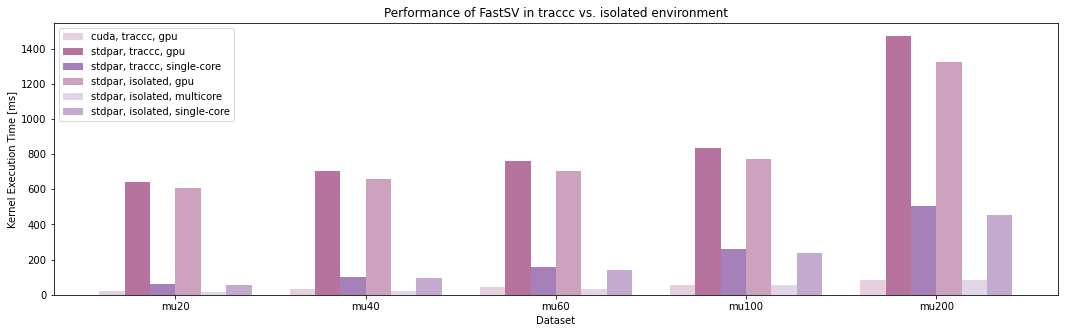

In [101]:
plot_multi_bar_chart(
    data=data,
    datalabels=labels,
    labels=datasets,
    colors=colors,
    title="Performance of FastSV in traccc vs. isolated environment"
)